In [1]:
# PREVIO A EJERCICIO 1: 

In [2]:
import pandas

In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [5]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [6]:
# dimensions
countries.shape

(252, 2)

In [7]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [8]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [9]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [10]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

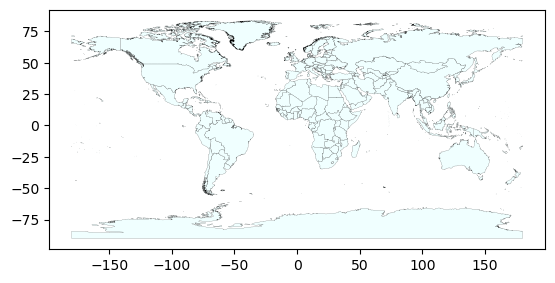

In [11]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [12]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

<Axes: >

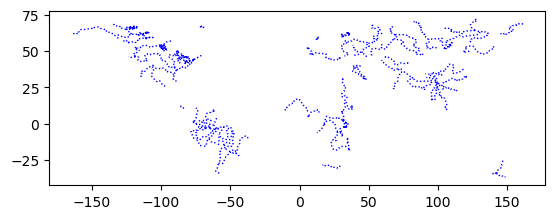

In [13]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

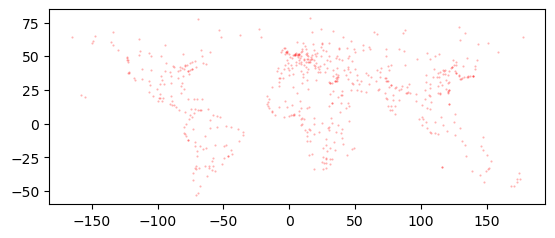

In [14]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

In [15]:
countries.crs==cities.crs==cities.crs

True

<Axes: >

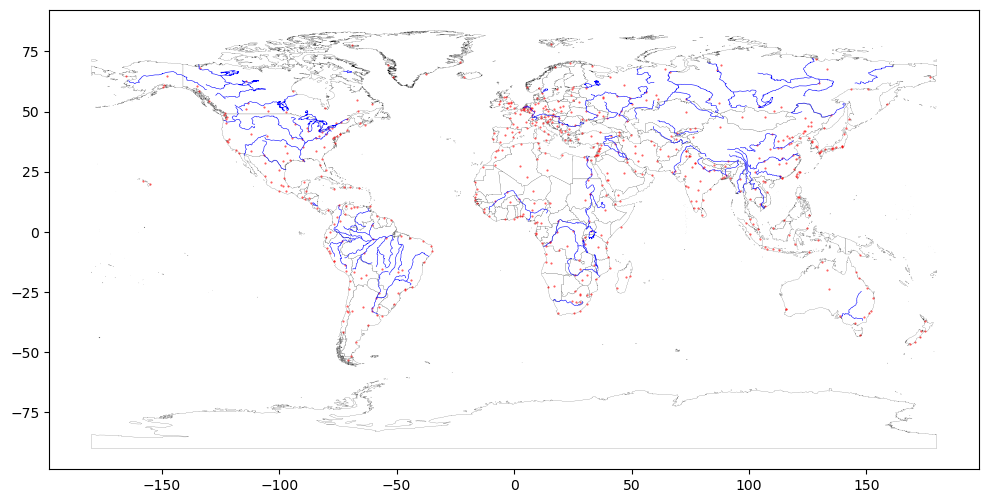

In [16]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [17]:
countries.to_file(os.path.join("maps","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("maps","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

In [18]:
# EJERCICIO 1 - DESARROLLO EN R STUDIO

In [19]:
## LINK A R PUBS: 

In [20]:
# SUBSETTING:

In [21]:
brazil=countries[countries.COUNTRY=='Brazil']

In [22]:
citiesBrazil_clipped = gpd.clip(gdf=cities,
                          mask=brazil)
riversBrazil_clipped = gpd.clip(gdf=rivers,
                               mask=brazil)

<Axes: >

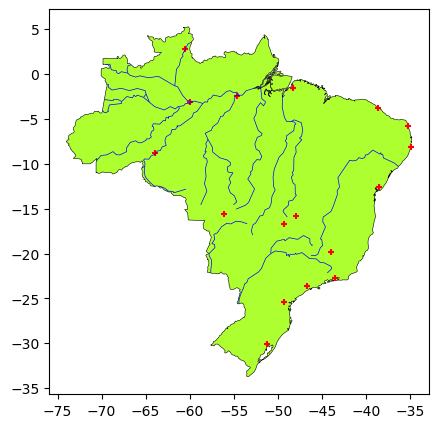

In [23]:
base = brazil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesBrazil_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversBrazil_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [24]:
brazil.geom_type

29    MultiPolygon
dtype: object

In [25]:
citiesBrazil_clipped.geom_type

285    Point
279    Point
276    Point
271    Point
268    Point
340    Point
275    Point
274    Point
568    Point
266    Point
447    Point
261    Point
338    Point
380    Point
381    Point
318    Point
421    Point
dtype: object

In [26]:
riversBrazil_clipped.geom_type

56         LineString
55         LineString
97         LineString
67         LineString
70         LineString
38         LineString
24    MultiLineString
5          LineString
64         LineString
68         LineString
83    MultiLineString
92    MultiLineString
59         LineString
37         LineString
80         LineString
1     MultiLineString
60         LineString
29    MultiLineString
66    MultiLineString
62         LineString
54         LineString
dtype: object

In [27]:
# EJERCICIO 2: 

In [28]:
peru=countries[countries.COUNTRY=='Peru']

In [29]:
citiesPeru_clipped = gpd.clip(gdf=cities,
                          mask=peru)
riversPeru_clipped = gpd.clip(gdf=rivers,
                               mask=peru)

<Axes: >

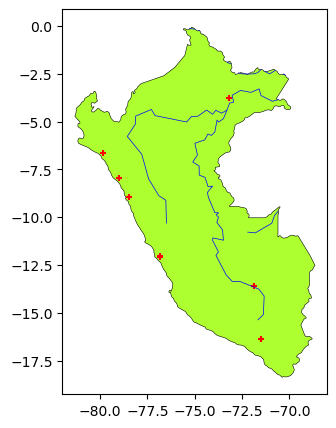

In [30]:
base = peru.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesPeru_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversPeru_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [31]:
peru.geom_type

172    Polygon
dtype: object

In [32]:
citiesPeru_clipped.geom_type

269    Point
339    Point
529    Point
317    Point
423    Point
260    Point
476    Point
422    Point
dtype: object

In [33]:
riversPeru_clipped.geom_type

59         LineString
1     MultiLineString
60    MultiLineString
85         LineString
65         LineString
dtype: object

In [34]:
## CONTINUACIÓN DEL EJERCICIO 2 en R STUDIO

In [35]:
# PROYECCIÓN DE MAPAS: 

In [36]:
# check units
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [37]:
# centroid
brazil.centroid

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21392\515368123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


29    POINT (-53.09009 -10.77302)
dtype: geometry

In [38]:
## REPROYECCIÓN:

In [39]:
# recommended for Brazil (meters)
brazil.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [40]:
# now this works
brazil.to_crs(5641).centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

<Axes: >

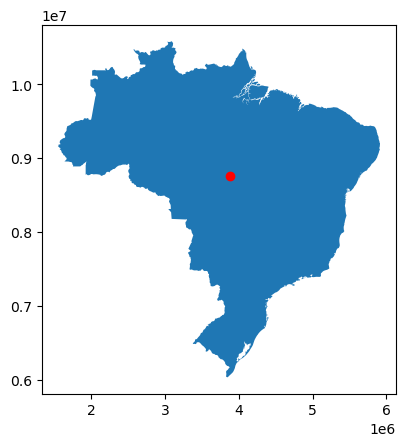

In [41]:
# replotting:

base5641=brazil.to_crs(5641).plot()
brazil.to_crs(5641).centroid.plot(color='red',ax=base5641)

In [42]:
brazil_5641=brazil.to_crs(5641)

cities_brazil_5641=citiesBrazil_clipped.to_crs(brazil_5641.crs)

rivers_brazil_5641=riversBrazil_clipped.to_crs(brazil_5641.crs)


In [43]:
# saving 
import os

brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='rivers', driver="GPKG")

In [44]:
brazil_5641.centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

In [45]:
brazil_5641.centroid.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='centroid', driver="GPKG")

In [46]:
# CREANDO DATA ESPACIAL: 

In [47]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","br-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
2,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,https://www.riogaleao.com/passageiros,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2024-05-09T15:04:08+00:00
3,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
7054,505308,BR-1760,heliport,Unimed Volta Redonda Helipad,-22.533988,-44.076918,1385,SA,Brazil,BR,...,Volta Redonda,0,SSKV,NaN,RJ0147,NaN,NaN,NaN,0,2022-12-06T21:28:25+00:00
7055,341727,BR-1429,heliport,Santa Helena Heliport,-23.59851,-47.441196,2254,SA,Brazil,BR,...,Votorantim,0,SWHE,NaN,SP0807,NaN,NaN,NaN,0,2021-03-07T10:30:07+00:00
7056,343017,BR-1493,heliport,Bandeiras Centro Empresarial Heliport,-23.536615,-47.449475,1827,SA,Brazil,BR,...,Votorantim,0,SWST,NaN,SP1306,NaN,NaN,NaN,0,2021-04-14T20:12:01+00:00
7057,509863,SN3D,heliport,Alphaville Nova Esplanada 2 Heliport,-23.558971,-47.473779,2083,SA,Brazil,BR,...,Votorantim,0,SN3D,NaN,SP1453,NaN,NaN,NaN,0,2023-06-30T14:01:13+00:00


In [48]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
1,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,https://www.riogaleao.com/passageiros,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2024-05-09T15:04:08+00:00
2,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
3,5967,SBRJ,medium_airport,Santos Dumont Airport,-22.9105,-43.163101,11,SA,Brazil,BR,...,Rio de Janeiro,1,SBRJ,SDU,RJ0002,https://www4.infraero.gov.br/aeroportos/aeropo...,https://en.wikipedia.org/wiki/Santos_Dumont_Ai...,RIO,750,2022-03-28T23:27:00+00:00
4,5872,SBBR,large_airport,Presidente Juscelino Kubitschek International ...,-15.869167,-47.920834,3497,SA,Brazil,BR,...,Brasília,1,SBBR,BSB,DF0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...,NaN,51275,2020-08-24T11:15:12+00:00


In [49]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [50]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [51]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7057 entries, 0 to 7056
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7057 non-null   object 
 1   type           7057 non-null   object 
 2   latitude_deg   7057 non-null   float64
 3   longitude_deg  7057 non-null   float64
 4   elevation_ft   6887 non-null   float64
 5   region_name    7057 non-null   object 
 6   municipality   7032 non-null   object 
dtypes: float64(3), object(4)
memory usage: 386.1+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

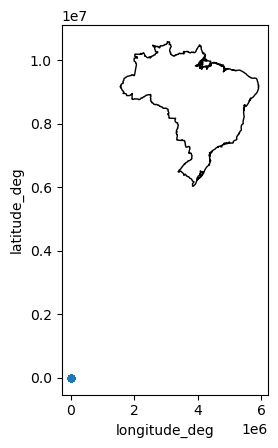

In [52]:
# let's plot

base = brazil_5641.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [53]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=brazil.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

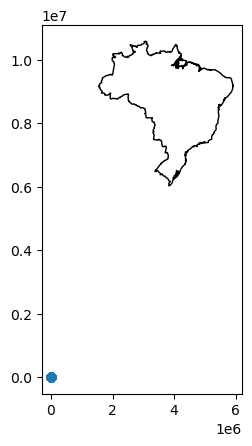

In [54]:
# does it look better?

# let's plot

base = brazil_5641.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [55]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

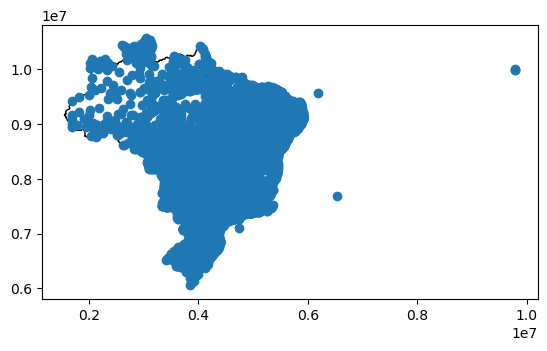

In [56]:
airports_5641=airports.to_crs(5641)

## then

base = brazil_5641.plot(color='white', edgecolor='black')
airports_5641.plot(ax=base)

In [57]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     4856
heliport          1782
closed             282
medium_airport     124
large_airport       11
seaplane_base        2
Name: count, dtype: int64

In [58]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

In [59]:
# adding the airports
airports_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='airports', driver="GPKG")

In [60]:
# EJERCICIO 3: 

In [61]:
## REPLOTEANDO PERÚ: 

In [62]:
# recommended for Peru (meters)
peru.to_crs(4326).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [63]:
# now this works
peru.to_crs(4326).centroid

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21392\3712566126.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.to_crs(4326).centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21392\2846146217.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.to_crs(4326).centroid.plot(color='red',ax=base5641)


<Axes: >

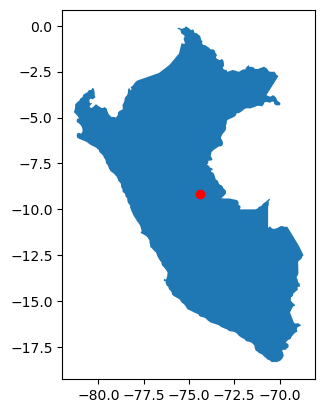

In [64]:
# replotting:

base5641=peru.to_crs(4326).plot()
peru.to_crs(4326).centroid.plot(color='red',ax=base5641)

In [65]:
peru_4326=peru.to_crs(4326)

cities_peru_4326=citiesPeru_clipped.to_crs(peru_4326.crs)

rivers_peru_4326=riversPeru_clipped.to_crs(peru_4326.crs)

In [66]:
# saving 
import os

peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='country', driver="GPKG")
cities_peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='cities', driver="GPKG")
rivers_peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='rivers', driver="GPKG")

In [67]:
peru_4326.centroid

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21392\1744977523.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru_4326.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [68]:
peru_4326.centroid.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='centroid', driver="GPKG")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21392\3614473474.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru_4326.centroid.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='centroid', driver="GPKG")


In [69]:
# DATA ESPACIAL PERÚ: 

In [70]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","pe-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.021900,-77.114305,113.0,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
1,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
2,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
3,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
200,351487,PE-0013,heliport,Pucallpa Air Force Heliport,-8.351500,-74.581900,505.0,SA,Peru,PE,...,Pucallpa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:32:29+00:00
201,351489,PE-0015,heliport,Puerto Anapati Heliport,-11.928590,-73.987700,1496.0,SA,Peru,PE,...,Puerto Anapati,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:37:03+00:00
202,351491,PE-0017,heliport,Puerto Ocopa Heliport,-11.147930,-74.306290,1056.0,SA,Peru,PE,...,Puerto Ocopa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:40:40+00:00
203,351492,PE-0018,heliport,Tanquin Heliport,-12.126320,-74.075990,1880.0,SA,Peru,PE,...,Tanquin,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:42:05+00:00


In [71]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
1,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
2,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
3,6242,SPZA,medium_airport,Maria Reiche Neuman Airport,-14.854000,-74.961502,1860.0,SA,Peru,PE,...,Nazca,1,SPZA,NZC,NaN,https://www.aeronasca.com/como-llegar-al-aerop...,https://en.wikipedia.org/wiki/Maria_Reiche_Neu...,NaN,750,2022-04-07T13:53:44+00:00
4,6232,SPQT,medium_airport,Coronel FAP Francisco Secada Vignetta Internat...,-3.784740,-73.308800,306.0,SA,Peru,PE,...,Iquitos,1,SPQT,IQT,NaN,NaN,https://en.wikipedia.org/wiki/Crnl._FAP_Franci...,NaN,750,2022-08-29T12:46:38+00:00


In [72]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [73]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [74]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

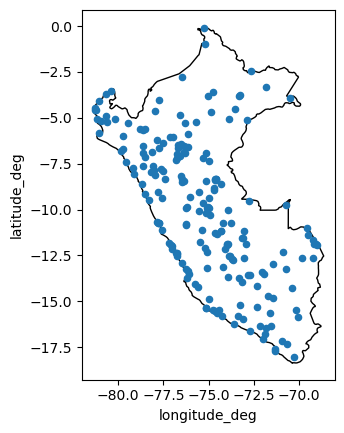

In [75]:
# let's plot

base = peru_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [76]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=peru.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

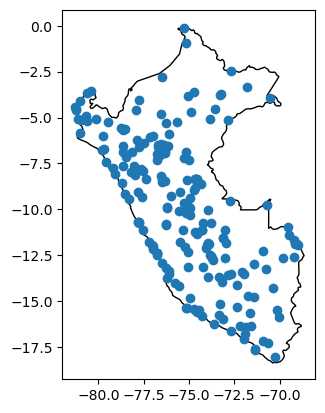

In [77]:
# does it look better?

# let's plot

base = peru_4326.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [78]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

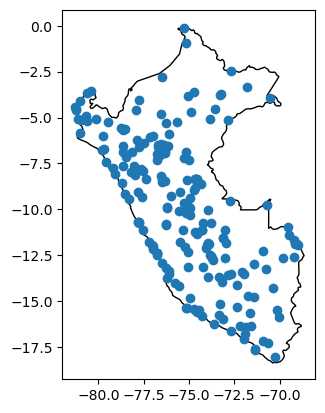

In [79]:
airports_4326=airports.to_crs(4326)

## then

base = peru_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [80]:
airports_4326['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     142
medium_airport     29
closed             25
heliport            6
large_airport       1
Name: count, dtype: int64

In [81]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

In [82]:
# adding the airports
airports_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='airports', driver="GPKG")

In [83]:
output_path = os.path.join("maps", "peruair_4326.shp")

# Guarda el GeoDataFrame como Shapefile
airports_4326.to_file(output_path, driver="ESRI Shapefile")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21392\2878259777.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  airports_4326.to_file(output_path, driver="ESRI Shapefile")


In [84]:
## CONTINUACIÓN DEL EJERCICIO 3 EN R STUDIO

In [ ]:
LINK DE R PUBS: https://rpubs.com/Santiagomv2906/1187886